In [1]:
import sympy as sym

In [2]:
# I0 = sym.Symbol('I0')
# I1 = sym.Symbol('I1')
# I2 = sym.Symbol('I2')
# I3 = sym.Symbol('I3')
# Z0 = sym.Symbol('Z0')
# Z1 = sym.Symbol('Z1')
# Z2 = sym.Symbol('Z2')
# Z3 = sym.Symbol('Z3')
Z = []
I = []

for i in range(10):
    I.append(sym.Symbol("I"+str(i)))
    Z.append(sym.Symbol("Z"+str(i)))

In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import random

In [4]:
import networkx as nx

def graph(we):
#     G = nx.Graph()
#     G.add_nodes_from([0, 1, 2, 3])
#     G.add_weighted_edges_from([(0, 1,we), (1, 2,we), (2, 3,we), (3, 0,we)])
    n =4

    G = nx.random_regular_graph(2,n
                                ,seed=1
                               )

#     nx.draw(G)
#     show()
    # nx.draw(G, with_labels=True, alpha=0.8, node_size=500)
    for (u, v) in G.edges():
        G.edges[u,v]['weight'] = random.randint(1,100)
    e = [(u, v) for (u, v, d) in G.edges(data=True)]

    pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=e, width=6)
    # nx.draw_networkx_edges(
    #     G, pos, edgelist=e, width=6, alpha=0.5, edge_color="b", style="dashed"
    # )

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels)
    return G

In [5]:
# print(G.edges(data=True))

In [6]:
def Hamil(G):    
    C = []
    eigen_val = []
    H = 0
    N = 2**G.number_of_nodes()
    bin_st = "0"
    bin_st += str(G.number_of_nodes())
    bin_st += "b"
    for i in range(N):
      k = 0
      f = 1
      stri = format(i, bin_st)
      for u,v,w in G.edges(data=True):
        if stri[u]!=stri[v]:
          k -= w['weight']
#       k = -k
      for j in range(G.number_of_nodes()):
        if stri[j]=='1':
          f *= (I[j]-Z[j])
        else:
          f *= (I[j]+Z[j])
      f *= k*(1/N)
      H += f
      C.append(k)
    for i in range(N):
      stri = format(i, bin_st)
      exp = H.subs(I[G.number_of_nodes()-1],1)
      for j in range(G.number_of_nodes()-1):
        exp = exp.subs(I[j],1)
      for j in range(G.number_of_nodes()):
        if stri[j] == '1':
            exp = exp.subs(Z[j],-1)
        else:
            exp = exp.subs(Z[j],1)
      eigen_val.append(exp)
    
    print("C = ",C)
    print("eigen_val = ",eigen_val)
    print("H = ",sym.expand(H))
    eigen_state = []
    mini_e = min(eigen_val)
    ind = 0
    for i in eigen_val:
        if i == mini_e:
            eigen_state.append(format(ind, bin_st))
        ind += 1
    print(eigen_state)
    return C,H,eigen_val,eigen_state

In [7]:
# from sympy import symbols

# x, y = symbols('x y')
# expr = 2*x + y
# print(expr)

In [8]:
# exp2 = expr.subs(x, 2)
# print(exp2)
# exp3 = exp2.subs(y,3)
# print(exp3)

In [9]:
!pip install qiskit

/bin/bash: pip: command not found


In [10]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
from qiskit.circuit import Parameter

# Adjacency is essentially a matrix which tells you which nodes are
# connected. This matrix is given as a sparse matrix, so we need to
# convert it to a dense matrix
# adjacency = nx.adjacency_matrix(G).todense()

nqubits = 4

# beta = Parameter("$\\beta$")
# qc_mix = QuantumCircuit(nqubits)
# for i in range(0, nqubits):
#     qc_mix.rx(2 * beta, i)
    
# qc_mix.draw()

In [11]:
# gamma = Parameter("$\\gamma$")
# qc_p = QuantumCircuit(nqubits)
# for pair in list(G.edges()):  # pairs of nodes
#     qc_p.rzz(2 * gamma, pair[0], pair[1])
#     qc_p.barrier()
    
# qc_p.decompose().draw()

In [12]:
# qc_0 = QuantumCircuit(nqubits)
# for i in range(0, nqubits):
#     qc_0.h(i)
    
# qc_0.draw()

In [13]:
# qc_qaoa = QuantumCircuit(nqubits)

# qc_qaoa.append(qc_0, [i for i in range(0, nqubits)])
# qc_qaoa.append(qc_p, [i for i in range(0, nqubits)])
# qc_qaoa.append(qc_mix, [i for i in range(0, nqubits)])

# qc_qaoa.decompose().decompose().draw()

In [14]:
from qiskit import IBMQ 
from qiskit import ClassicalRegister, QuantumCircuit, Aer, execute, transpile

In [15]:
# IBMQ.save_account("d9cd4db7c9f62399a00b9cf4d38c25a7cf697b6e81196d6cc9b9da7aaaf64a9cdaeff9ee2119111e4ee3ae5ca6cda330dfbc1c11c2678d2b28f2bbbfd88c30ef")
# IBMQ.load_account() # Load account from disk
# provider = IBMQ.get_provider()
# print(provider)

In [16]:
# print(provider.backends())

In [17]:
# back = provider.get_backend('ibmq_qasm_simulator')
back = Aer.get_backend('aer_simulator')

In [18]:
def maxcut_obj(x, G):
    """
    Given a bitstring as a solution, this function returns
    the number of edges shared between the two partitions
    of the graph.
    
    Args:
        x: str
           solution bitstring
           
        G: networkx graph
        
    Returns:
        obj: float
             Objective
    """
    obj = 0
    for i, j, w in G.edges(data=True):
        if x[i] != x[j]:
            obj -= w['weight']
            
    return obj


def compute_expectation(counts, G):
    
    """
    Computes expectation value based on measurement results
    
    Args:
        counts: dict
                key as bitstring, val as count
           
        G: networkx graph
        
    Returns:
        avg: float
             expectation value
    """
    
    avg = 0
    sum_count = 0
    for bitstring, count in counts.items():
        
        obj = maxcut_obj(bitstring[::-1], G)
        avg += obj * count
        sum_count += count
#     print("cost : ",avg/sum_count)    
    return avg/sum_count


# We will also bring the different circuit components that
# build the qaoa circuit under a single function
def create_qaoa_circ(G,H, theta):
    
    """
    Creates a parametrized qaoa circuit
    
    Args:  
        G: networkx graph
        theta: list
               unitary parameters
                     
    Returns:
        qc: qiskit circuit
    """
    
    nqubits = len(G.nodes())
    p = len(theta)//2  # number of alternating unitaries
#     p = p_layer
    qc = QuantumCircuit(nqubits)
    
    beta = theta[:p]
    gamma = theta[p:]
    
    # initial_state
    for i in range(0, nqubits):
        qc.h(i)
    
    for irep in range(0, p):
        
        # problem unitary
#         exp2 = 0
#         exp1 = -1
        for u,v,k in G.edges(data=True):
#             exp1 = H.subs(I[nqubits-1],1)
#             exp1 = exp1.subs(Z[nqubits-1],0)
#             for l in range(nqubits-1):
#                 exp1 = exp1.subs(I[l],1)
#                 exp1 = exp1.subs(Z[l],0)
#             exp2 = H.subs(I[nqubits-1],1)
#             for l in range(nqubits):
#                 exp2 = exp2.subs(I[l],1)
#                 if l in pair:
#                     exp2 = exp2.subs(Z[l],1)
#                 else:
#                     exp2 = exp2.subs(Z[l],0)
# #             print(pair," ",exp2-exp1)
            qc.cx(u,v)
            qc.rz(2 * gamma[irep]*k["weight"], v)
            qc.cx(u,v)
#             qc.rzz(2 * gamma[irep]*k["weight"], u, v)

        # mixer unitary
        for i in range(0, nqubits):
            qc.rx(2 * beta[irep], i)
            
    qc.measure_all()
        
    return qc

# Finally we write a function that executes the circuit on the chosen backend
def get_expectation(G,H, shots=512):
    
    """
    Runs parametrized circuit
    
    Args:
        G: networkx graph
        p: int,
           Number of repetitions of unitaries
    """
    
    backend = back
    backend.shots = shots
    
    def execute_circ(theta):
        
        qc = create_qaoa_circ(G,H, theta)
        counts = backend.run(qc,nshots=512).result().get_counts()
        
        return compute_expectation(counts, G)
    
    return execute_circ

In [19]:
from scipy.optimize import minimize,basinhopping
import numpy as np

In [20]:
from qiskit.visualization import plot_histogram

In [21]:
import math

In [22]:
w = [5]
ans = []
p_layer = 0

In [23]:
dict_op = {}
G_rand = {}

In [24]:
fp = open("result_rand_threads_2.txt","w")

In [25]:
def call_back(x, f, a):
    if a==True:
        print(f," ",a)

In [26]:
def find_p(we):
    sc = 100
    p_layer = 1
    G = graph(we)
    G_rand[we] = G
    C,H,e_val,e_s = Hamil(G)
    while(sc>1):
        initial_theta = np.ones(2*p_layer)

        expectation = get_expectation(G,H)
        minimizer_kwargs = {"method": "COBYLA"}
        res = basinhopping(expectation, initial_theta, minimizer_kwargs=minimizer_kwargs,
                            niter=500, callback=call_back)

#         res = minimize(expectation, 
#                               initial_theta, 
#                               method='SLSQP')
#         res

        backend = back
        backend.shots = 512

        qc_res = create_qaoa_circ(G,H, res.x)

        counts = backend.run(qc_res).result().get_counts()

        display(plot_histogram(counts))
        
        total_count = 0
        for i in counts:
          total_count += counts[i]
        #compute score
        score = 0
        for i in counts:
          if i not in e_s:
            score += counts[i]
#           else:
#             score += (counts[i]/total_count-0)**2
        score = score/total_count*100
        fp.write(f"graph {we}\nlayer {p_layer}\nError in results(in per) = {score}\n")
        print("graph ",we,"\n","layer ",p_layer,"\n","Error in results(in per) = ",score,"\n")
        p_layer+=1
        sc = score
    e_val = set(e_val)
    e_val = list(e_val)
    dict_op[we] = [e_val[0]-e_val[1], p_layer-1,sc]
    return p_layer-1
    

In [27]:
print(ans)

[]


C =  [0, -99, -119, -218, -131, -70, -148, -87, -87, -148, -70, -131, -218, -119, -99, 0]
eigen_val =  [0, -99.0000000000000, -119.000000000000, -218.000000000000, -131.000000000000, -70.0000000000000, -148.000000000000, -87.0000000000000, -87.0000000000000, -148.000000000000, -70.0000000000000, -131.000000000000, -218.000000000000, -119.000000000000, -99.0000000000000, 0]
H =  -109.0*I0*I1*I2*I3 + 40.0*I0*I2*Z1*Z3 + 25.5*I0*I3*Z1*Z2 + 9.5*I1*I2*Z0*Z3 + 34.0*I1*I3*Z0*Z2
['0011', '1100']
-137.7998046875   True
-142.978515625   True
-145.873046875   True
-154.1640625   True
-161.896484375   True
-168.982421875   True
-169.779296875   True
-172.107421875   True
-172.912109375   True
-172.9599609375   True
-172.9375   True
-172.78125   True
-176.302734375   True
-175.2451171875   True
-176.2294921875   True
-175.470703125   True
-175.537109375   True


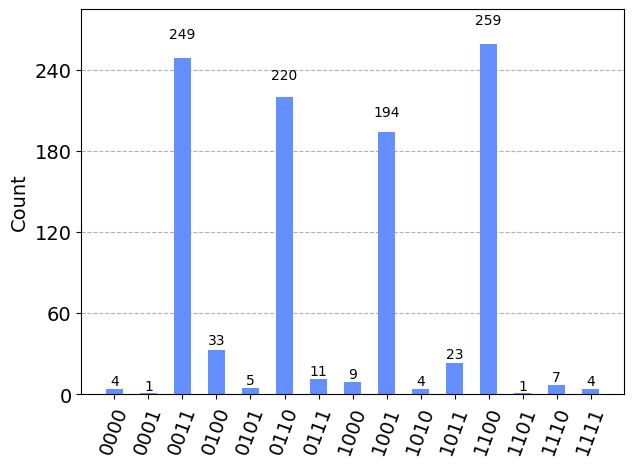

graph  5 
 layer  1 
 Error in results(in per) =  50.390625 

-153.759765625   True
-170.3251953125   True
-183.6923828125   True
-197.9560546875   True
-196.609375   True
-198.0908203125   True


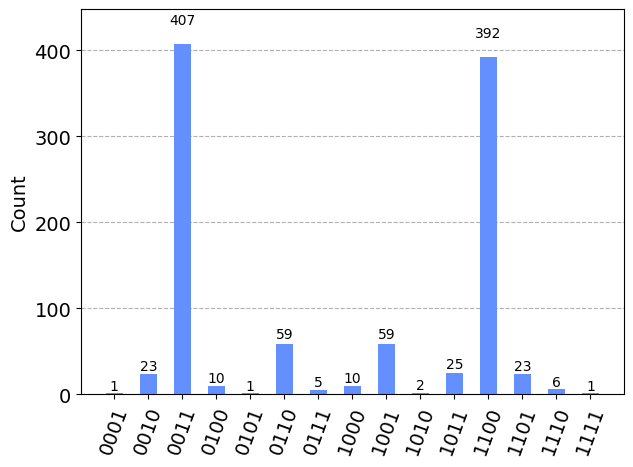

graph  5 
 layer  2 
 Error in results(in per) =  21.97265625 

-175.580078125   True
-185.35546875   True
-190.150390625   True
-195.6201171875   True
-199.3603515625   True
-202.103515625   True
-204.830078125   True


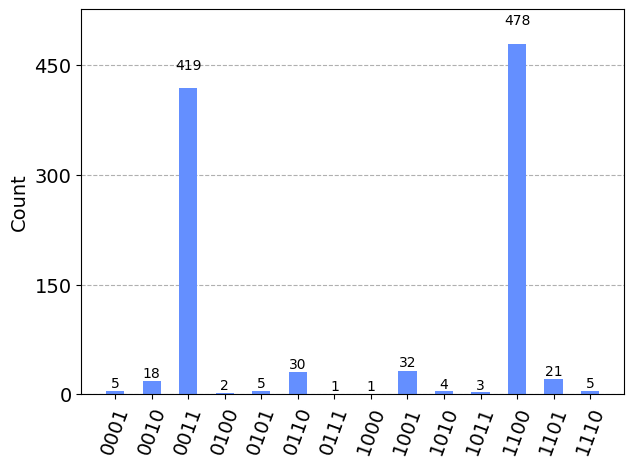

graph  5 
 layer  3 
 Error in results(in per) =  12.40234375 

-187.2548828125   True
-189.513671875   True
-203.8310546875   True
-202.8935546875   True
-204.1240234375   True
-208.1513671875   True
-209.2099609375   True
-211.4990234375   True


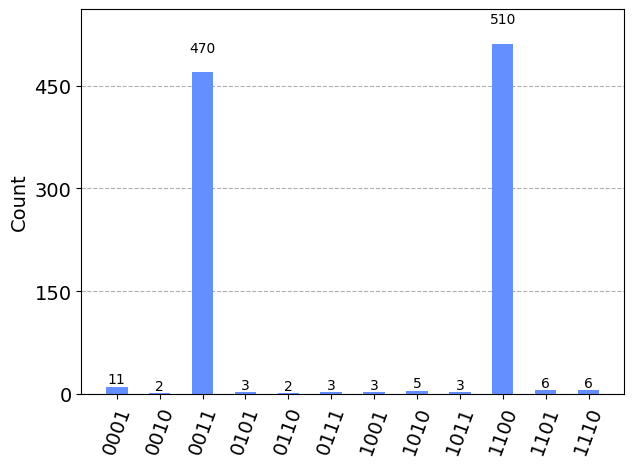

graph  5 
 layer  4 
 Error in results(in per) =  4.296875 

-198.1396484375   True
-201.267578125   True
-203.53125   True
-206.9638671875   True
-207.6064453125   True
-205.4921875   True
-206.5517578125   True
-207.5205078125   True
-207.453125   True
-206.076171875   True


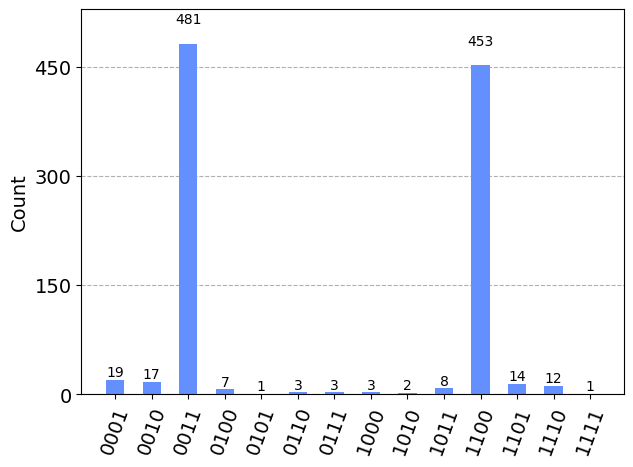

graph  5 
 layer  5 
 Error in results(in per) =  8.7890625 

-182.4697265625   True
-181.357421875   True
-187.705078125   True
-196.17578125   True
-199.017578125   True
-199.1123046875   True
-202.9921875   True
-208.2890625   True
-208.322265625   True
-208.9482421875   True
-210.2724609375   True
-210.517578125   True
-212.759765625   True


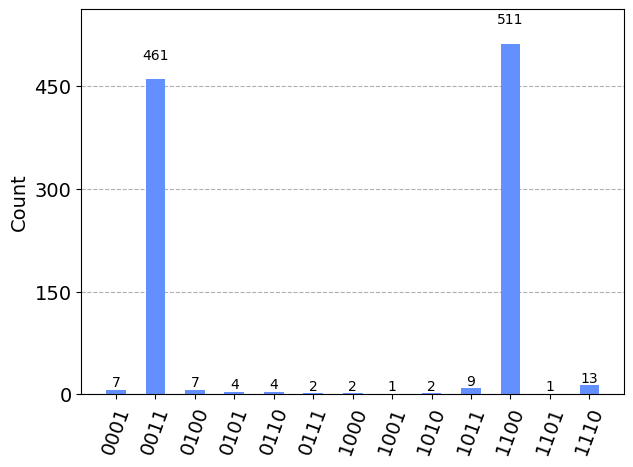

graph  5 
 layer  6 
 Error in results(in per) =  5.078125 

-177.9853515625   True
-196.865234375   True
-202.9130859375   True
-206.630859375   True
-206.1513671875   True
-205.5048828125   True
-208.77734375   True
-212.0498046875   True
-209.759765625   True
-184.84375   True
-203.015625   True
-205.4111328125   True
-209.9716796875   True
-208.7294921875   True
-215.2314453125   True


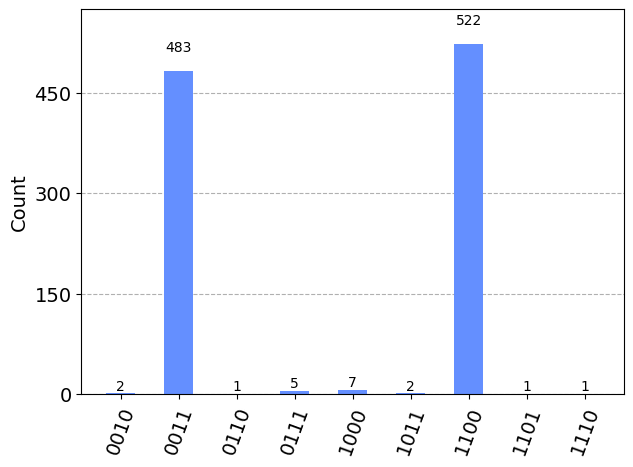

graph  5 
 layer  8 
 Error in results(in per) =  1.85546875 

-167.1796875   True
-175.1669921875   True
-204.8779296875   True
-207.3232421875   True
-207.8759765625   True
-212.462890625   True
-213.10546875   True
-212.158203125   True
-212.037109375   True
-211.55859375   True
-213.572265625   True
-214.94140625   True


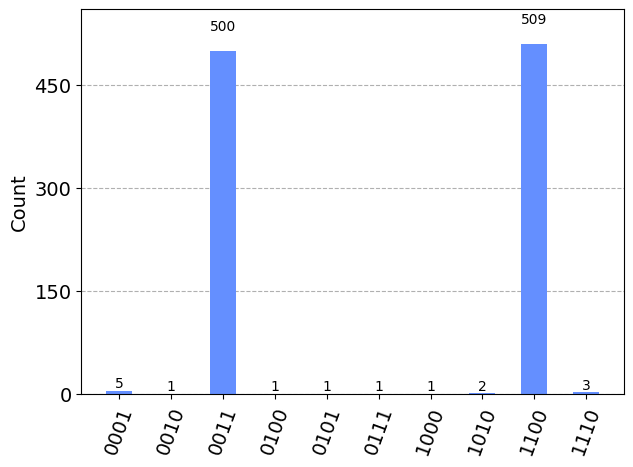

graph  5 
 layer  9 
 Error in results(in per) =  1.46484375 

-195.4765625   True
-206.2236328125   True
-209.09765625   True
-213.166015625   True
-213.130859375   True
-212.7822265625   True
-210.111328125   True
-209.4755859375   True
-211.0625   True
-210.5927734375   True
-210.849609375   True
-214.4990234375   True


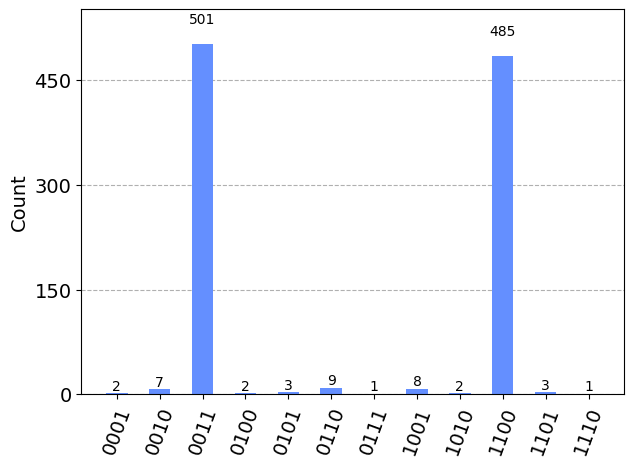

graph  5 
 layer  10 
 Error in results(in per) =  3.7109375 

-214.16796875   True
-210.7001953125   True
-212.400390625   True
-209.9677734375   True
-212.0   True
-215.630859375   True


In [ ]:
import threading

t1 = threading.Thread(target=find_p, args=(w[0],))
# t2 = threading.Thread(target=find_p, args=(w[1],))
# t3 = threading.Thread(target=find_p, args=(w[2],))
# t4 = threading.Thread(target=find_p, args=(w[3],))
# t5 = threading.Thread(target=find_p, args=(w[4],))

t1.start()
# t2.start()
# t3.start()
# t4.start()
# t5.start()
 

t1.join()
# t2.join()
# t3.join()
# t4.join()
# t5.join()

In [ ]:
# for we in w:
#     find_p(we)

In [ ]:
print(dict_op)

In [ ]:
fp.close()